In [21]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
# import the data as a table
transactions_df = pd.read_csv("data/ethereum_transactions_20191201_20191203.csv")
print(transactions_df.shape)
transactions_df.head()

(1906807, 17)


,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0x7dcd0bb8903653b3c145e293b76da46839b6dbd06bc7...,32,52,0xd0e83c5e18b2fefa6536ea324d411720e3918f12,0xbac6874fff7ac02c06907d0e340af9f1832e7908,0,67072,3600000256,0xa9059cbb0000000000000000000000004b678c63032b...,3721361,51594,NaN,NaN,1,2019-12-01 07:06:42 UTC,9031172,0xaf7bb1b8b6d66599d54ad02d2527d38fb4cbac8d0477...
1,0x026e4a9af1540fc8d4f0305b19f2da6b5f9ff68345da...,133,33,0xd0e83c5e18b2fefa6536ea324d411720e3918f12,0xbac6874fff7ac02c06907d0e340af9f1832e7908,0,67072,1440000000,0xa9059cbb00000000000000000000000061476e594d89...,3890781,51594,NaN,NaN,1,2019-12-01 18:40:41 UTC,9033838,0x47c3234dcbd8054e8dbeddd3a1518d59b2b2737dc688...
2,0x19e4c62b5f2e718d166b135948794468722f98142b35...,55,9,0x4881229b75ae7d6e37a3c870600ebb5dc2113c25,0xa61d50fdda5a80917c2b893266b5b5bb363de6f2,0,8000000,3200000000,0xad8733ca000000000000000000000000ac08809df104...,3729357,3381296,NaN,NaN,1,2019-12-01 22:37:36 UTC,9034769,0x5b12136e4ae616061946eebc5fbab3ff418c125d7a7d...
3,0x661f9dc0b7482e450aeab49e675e329a9c1cdbb57e0a...,7000,72,0x4d953115678b15ce0b0396bcf95db68003f86fb5,0x411995486801604d2b1e641a756938a6bfea60fb,0,334592,10000000001,0x6a7612020000000000000000000000008dd5fbce2f6a...,3229349,68493,NaN,NaN,1,2019-12-01 10:11:23 UTC,9031900,0xe4550e0c3ca94a95e4b54b9663242ba082133ded5c5c...
4,0xe0b9b994e8ef5556d85cdd08cdcf3082af5cdd2c339b...,9903,76,0x2e9ce539d7e316468dfa447685a8e761ba639c1f,0xb04239b53806ab31141e6cd47c63fb3480cac908,24000000000000000,800000,2100000000,0x81e2f252000000000000000000000000000000000000...,8668886,481563,NaN,NaN,1,2019-12-01 07:45:37 UTC,9031314,0x70fcd7e80d56cad0a3bbc3e1f968399200bfac5d2303...


In [6]:
transactions_df.sample(23)

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
1750039,0x3991ecd300bfb44076eeb9d5702fb1e9d0c521fa72f9...,15003,136,0x810e5d9e59afccf5668f633d129a2b556fbb40fb,0x39755357759ce0d7f32dc8dc45414cca409ae24e,0,231451,16500000000,0xb4f9b6c8000000000000000000000000000000000000...,7835946,65726,NaN,NaN,1,2019-12-01 12:15:01 UTC,9032365,0x90234300c8ca79edee5759a01f09f325c91e58e1ffad...
1499038,0x74a89e1390927c16ee3696111a85dc79d1996ed5aa7d...,8,12,0x697e7075467db3cb96ec36d24310e232c0827a8b,0x856d1cd3b5301bd76d9cb9f6e1f1f1e1ef0ee74a,0,60000,10000000000,0xa9059cbb000000000000000000000000bac9916209db...,439449,21888,NaN,NaN,1,2019-12-03 08:38:39 UTC,9042754,0xb1619214189c714b07c3d4b92c8ec8a80d90e57e5db0...
1014052,0xed080b044a7bdc91fc2714fae27a9e796b771d2abf0a...,7749,82,0x1e8afd7e4fe1ed2c190ae3817eba9f942d1b1a03,0xfaafdc07907ff5120a76b34b731b278c38d6043c,0,191529,10000000000,0x3d7d20a41000000000000f2500000000000000000000...,3487578,138696,NaN,NaN,1,2019-12-01 06:30:26 UTC,9031033,0x814c9e479662e210cb52beed8701d832e5cce00839ec...
1857438,0x1f8f55bc735f014dfc4e6d4f69f0d7f2bd974ee76656...,0,51,0xc5e0b65e45459ddedf81d63b051bd69770e1caa4,0x0e36a802fa43e1774e04d74a32aaedb1ffdee0be,14596430000000000,21000,12000000000,0x,2120314,21000,NaN,NaN,1,2019-12-02 07:49:02 UTC,9036942,0x6fda5f98c10266c297de29605278ebbd659327cca772...
1775073,0xf21699b56f2795bd81c95bbf26f2b9d8d007a61ad4c3...,1,24,0x4eb8ef8134b5279872c210f5f9134a576a74f559,0x0d8775f648430679a709e98d2b0cb6250d2887ef,0,200000,11000000000,0xa9059cbb00000000000000000000000052fd4f9b3129...,859369,51852,NaN,NaN,1,2019-12-03 16:10:48 UTC,9044591,0x817b68c826c74fadf631314654f8d2d6afd96c0693d7...
452320,0x9ee06dc4601933f49e4a5717af130c1d82b04cc64d38...,190800,105,0x9fcafcca8aec0367abb35fbd161c241f7b79891b,0x209e13e2b4637a48632ec480e25ab8af1975c041,3840000000000000000,65500,11000000000,0x,5122702,33705,NaN,NaN,1,2019-12-03 09:59:03 UTC,9043063,0x85ffcb70bbabfb05258d477c70039a254d8d353d7ac8...
644707,0x9253881e18aad307d08e88da3bdfcfef248c7d6973b5...,105683,93,0x56178a0d5f301baf6cf3e1cd53d9863437345bf9,0xe41d2489571d322189246dafa5ebde1f4699f498,0,147174,10001000000,0x095ea7b30000000000000000000000007a3370075a54...,8551928,47174,NaN,NaN,1,2019-12-03 15:53:36 UTC,9044537,0x9255fb55d9bfd14f20cb7b1fa58766557827d1124921...
1734237,0x125c35746153faa178cf3e5446c576e18f19501dfa14...,26429,39,0xd2a51b9fb597436645227b136fd7af27fe30839f,0x10e13774f46f6ad459ff9831d9a99c18aea32dd1,3000000000000000,90000,10000000000,0x,1864255,21000,NaN,NaN,1,2019-12-03 13:27:49 UTC,9043912,0x5f1846c8f32fedc77703bfb93234356693e9409e1b06...
140105,0x262d81828229f3061a8c7e18fc33426449b50b48cf58...,1,139,0x6fe3e99fea5cf2510f74e19d0279c6c0a61ef2c0,0xbe80eaec51e163b30702ec2f07b80605d0f4fe9a,618540000000000,21000,8000000000,0x,6540956,21000,NaN,NaN,1,2019-12-02 11:52:11 UTC,9037921,0xce7d666c7a96a44dbab44274d1e35c1227beb60441b0...
1175244,0xd1443e9331c3c6b6d49cb6c3db8d5e2efbfaf74c6a9c...,101228,17,0x24c654f6b143dc5cae3c02fbb527ca63aa555dbc,0x722b94e235e6a4c98d974fa891f94286049e39c9,8400000000000000,420000,35000000000,0x,691879,21000,NaN,NaN,1,2019-12-01 06:42:28 UTC,9031075,0xbb6fdfd658467b44cf47bf797cd82e919cfc5eb6a7e2...


In [7]:
transactions_df.describe(include='all')

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
count,1906807,1.906807e+06,1.906807e+06,1906807,1901239,1906807,1.906807e+06,1.906807e+06,1906807,1.906807e+06,1.906807e+06,5568,0.0,1.906807e+06,1906807,1.906807e+06,1906807
unique,1906807,NaN,NaN,447601,351457,315846,NaN,NaN,1017328,NaN,NaN,5568,NaN,NaN,16270,NaN,16270
top,0xeae104a0d444d58a5eaa1affb689f0fbbffa13b64a57...,NaN,NaN,0xf509accd096a82ef2562d316669d0aa4b60f3796,0xdac17f958d2ee523a2206206994597c13d831ec7,0,NaN,NaN,0x,NaN,NaN,0xbefbc72291d265d782a36a1266d1cefe12fdc2ec,NaN,NaN,2019-12-02 02:40:58 UTC,NaN,0x2d65b6eeb2e80d313bc3c8229c918e8d6c74b64a287d...
freq,1,NaN,NaN,40887,281713,1258837,NaN,NaN,580316,NaN,NaN,1,NaN,NaN,467,NaN,467
mean,NaN,8.043663e+05,7.927333e+01,NaN,NaN,NaN,1.933469e+05,1.511285e+10,NaN,4.255843e+06,6.972611e+04,NaN,NaN,9.850326e-01,NaN,9.037671e+06,NaN
std,NaN,3.677386e+06,5.926058e+01,NaN,NaN,NaN,5.631867e+05,3.779229e+10,NaN,3.080685e+06,2.327968e+05,NaN,NaN,1.214225e-01,NaN,4.708943e+03,NaN
min,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,2.100000e+04,0.000000e+00,NaN,1.316100e+04,1.316100e+04,NaN,NaN,0.000000e+00,NaN,9.029510e+06,NaN
25%,NaN,2.200000e+01,3.100000e+01,NaN,NaN,NaN,4.839450e+04,4.620000e+09,NaN,1.381105e+06,2.100000e+04,NaN,NaN,1.000000e+00,NaN,9.033384e+06,NaN
50%,NaN,1.990000e+03,6.800000e+01,NaN,NaN,NaN,7.161300e+04,1.009715e+10,NaN,3.863967e+06,3.674400e+04,NaN,NaN,1.000000e+00,NaN,9.037521e+06,NaN
75%,NaN,6.304500e+04,1.180000e+02,NaN,NaN,NaN,1.200000e+05,2.060000e+10,NaN,6.903249e+06,5.239100e+04,NaN,NaN,1.000000e+00,NaN,9.041902e+06,NaN


In [8]:
transactions_df.dtypes

hash                            object
nonce                            int64
transaction_index                int64
from_address                    object
to_address                      object
value                           object
gas                              int64
gas_price                        int64
input                           object
receipt_cumulative_gas_used      int64
receipt_gas_used                 int64
receipt_contract_address        object
receipt_root                   float64
receipt_status                   int64
block_timestamp                 object
block_number                     int64
block_hash                      object
dtype: object

In [9]:

transactions_df['value'] = transactions_df['value'].astype(float)
transactions_df['ether_value'] = transactions_df['value'] * (1/10**18)

In [10]:
transactions_df['block_timestamp'] = pd.to_datetime(transactions_df['block_timestamp'])

In [18]:
 #lets see how many blocks there are, and about how many transactions are in each block

block_df = transactions_df.loc[:,['block_number','hash']].groupby('block_number').count().rename(columns={'hash':'count'})
print(f"Number of blocks: {block_df.shape[0]}")
block_df.sort_values(by='count', ascending=False).head(22)

Number of blocks: 16270


,count
block_number,
9035711,467
9035732,434
9035705,421
9030092,414
9035708,414
9037489,408
9038012,404
9030094,400
9035860,397


In [20]:
block_number = 9035711
single_block_df = transactions_df.loc[transactions_df['block_number'] == block_number,:]
print(single_block_df.shape[0])
print(single_block_df['block_timestamp'].min())



467
2019-12-02 02:40:58+00:00


In [22]:
single_block_df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash,ether_value
4704,0x0d7b8ac983c4964112cc1e4e1bd1e849d887f6cc3bea...,8334764,210,0x829bd824b016326a401d083b33d092293333a830,0x63493e572daecacace0f11c188c47f1bbb2a67bc,1.043946e+17,210000,3400000000,0x,4431000,21000,NaN,NaN,1,2019-12-02 02:40:58+00:00,9035711,0x2d65b6eeb2e80d313bc3c8229c918e8d6c74b64a287d...,0.104395
4705,0xe7b0dc8b095ec2dfa28935a62d2f86d1be05f662527e...,8334989,435,0x829bd824b016326a401d083b33d092293333a830,0xc6ad67b0210c220f31c32c85ea86b0dd56feca68,1.000654e+17,210000,3400000000,0x,9174512,21000,NaN,NaN,1,2019-12-02 02:40:58+00:00,9035711,0x2d65b6eeb2e80d313bc3c8229c918e8d6c74b64a287d...,0.100065
4706,0x52b6554de42d4064126839cfc7314e773b7bcea1fad7...,8334561,7,0x829bd824b016326a401d083b33d092293333a830,0x38fa1c13ae6fade514197431be4a7e922fc3c7cc,1.084425e+17,210000,3400000000,0x,168000,21000,NaN,NaN,1,2019-12-02 02:40:58+00:00,9035711,0x2d65b6eeb2e80d313bc3c8229c918e8d6c74b64a287d...,0.108442
4707,0xb4528060fb94e103acb3e7c48af2384c669308908404...,8334982,428,0x829bd824b016326a401d083b33d092293333a830,0xf2fa1469c754b72594f713bc28eddd32b8924406,1.002820e+17,210000,3400000000,0x,9027512,21000,NaN,NaN,1,2019-12-02 02:40:58+00:00,9035711,0x2d65b6eeb2e80d313bc3c8229c918e8d6c74b64a287d...,0.100282
4708,0xef429d71568999c183824d048512cccb851ec71acc3b...,8334737,183,0x829bd824b016326a401d083b33d092293333a830,0x62786f4daf0c4296c63ef1ba2e44ddccfd0b7933,1.048321e+17,210000,3400000000,0x,3864000,21000,NaN,NaN,1,2019-12-02 02:40:58+00:00,9035711,0x2d65b6eeb2e80d313bc3c8229c918e8d6c74b64a287d...,0.104832


In [24]:
# lets see if we can draw a block!

# obtain a list odf addresses
from_addresses = single_block_df['from_address'].unique()
to_addresses = single_block_df['to_address'].unique() 
all_addresses = [i for i in from_addresses] 
for i in to_addresses: 
    if i not in all_addresses:
        all_addresses.append(i)

print(len(all_addresses))
all_addresses[:2]

475


['0x829bd824b016326a401d083b33d092293333a830',
 '0xefecc94d432ffbe0f5a122aa84c5c9948a1a2e41']

In [29]:
G = nx.DiGraph()

for i in all_addresses:
    if i not in list(G.nodes):
        G.add_node(i)
        temp_df = single_block_df.loc[(single_block_df['from_address'] == i) | (single_block_df['to_address'] == i), :]
        for index, row in temp_df.iterrows():
            if i == row['from_address']:
                if row['to_address'] not in list(G.nodes):
                    G.add_node(row['to_address'])
            else:
                if row['from_address'] not in list(G.nodes):
                    G.add_node(row['from_address'])
            G.add_edge(row['from_address'], row['to_address'])

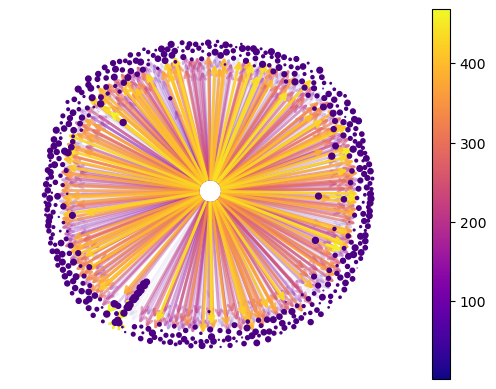

In [39]:
seed = 13648  # Seed random number generators for reproducibility

pos = nx.spring_layout(G, seed=seed)
M = G.number_of_edges()
edge_colors = range(2, M + 2)
node_sizes = [0.04*i for i in range(len(G))]


edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    #node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()

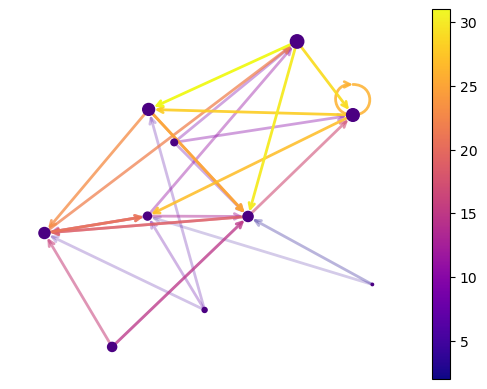

In [26]:
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()

In [11]:

# Group by 'to_address' to get credit counts and values
credits = transactions_df.groupby('to_address').agg(
    credit_count=('ether_value', 'count'),      # Number of credits received
    credit_value=('ether_value', 'sum'),        # Total ether value credited
    unique_senders=('from_address', 'nunique')  # Count of unique addresses sending ether
).reset_index()

# Group by 'from_address' to get debit counts, values, and nonce statistics
debits = transactions_df.groupby('from_address').agg(
    debit_count=('ether_value', 'count'),        # Number of debits sent
    debit_value=('ether_value', 'sum'),          # Total ether value debited
    unique_receivers=('to_address', 'nunique'),  # Count of unique addresses ether was sent to
    min_nonce=('nonce', 'min'),                  # Minimum nonce
    max_nonce=('nonce', 'max')                   # Maximum nonce
).reset_index()

# Combine the two dataframes (credits and debits) into a single dataframe, merging on address
# Since one address could appear as both from_address (debits) and to_address (credits), use an outer merge.
result_df = pd.merge(debits, credits, left_on='from_address', right_on='to_address', how='outer')

# Rename the columns for consistency and clarity
result_df.rename(columns={
    'from_address': 'address',     # Rename to a single "address" column
    'credit_count': 'credit_count',
    'credit_value': 'credit_value',
    'unique_senders': 'unique_senders',
    'debit_count': 'debit_count',
    'debit_value': 'debit_value',
    'unique_receivers': 'unique_receivers',
    'min_nonce': 'min_nonce',
    'max_nonce': 'max_nonce'
}, inplace=True)

result_df['address'] = result_df['address'].fillna(-1)
result_df['address'] = result_df.apply(lambda x: x['address'] if x['address'] != -1 else x['to_address'], axis=1)
result_df.drop(columns='to_address', inplace=True)
# Fill any NaN values resulting from the outer merge with zeros (for counts/values) or appropriate defaults
result_df[['credit_count', 'credit_value', 'unique_senders', 'debit_count', 'debit_value', 'unique_receivers']] = result_df[['credit_count', 'credit_value', 'unique_senders', 'debit_count', 'debit_value', 'unique_receivers']].fillna(0)

# Display the result
print(result_df.shape)

result_df.head()


(548722, 9)


,address,debit_count,debit_value,unique_receivers,min_nonce,max_nonce,credit_count,credit_value,unique_senders
0,0x0000000000000000000000000000000000000000,0.0,0.0,0.0,NaN,NaN,95.0,0.0,10.0
1,0x000000000000000000000063616e63656c6c6564,0.0,0.0,0.0,NaN,NaN,1.0,0.0,1.0
2,0x000000000000541e251335090ac5b47176af4f7e,0.0,0.0,0.0,NaN,NaN,163.0,54.5,6.0
3,0x0000000000013949f288172bd7e36837bddc7211,0.0,0.0,0.0,NaN,NaN,7.0,0.0,1.0
4,0x0000000000075efbee23fe2de1bd0b7690883cc9,0.0,0.0,0.0,NaN,NaN,27.0,0.0,2.0


In [12]:
result_df.describe(include='all')

,address,debit_count,debit_value,unique_receivers,min_nonce,max_nonce,credit_count,credit_value,unique_senders
count,548722,548722.000000,548722.000000,548722.000000,4.476010e+05,4.476010e+05,548722.000000,548722.000000,548722.000000
unique,548722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0xffffe7d8929f2634400ef41d4f49f76fd3dd236f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.474996,6.964703,1.473688,4.011441e+02,4.044041e+02,3.464849,6.964698,1.473688
std,NaN,114.164006,423.561971,69.381056,4.815376e+04,4.822483e+04,395.367229,418.917925,129.856907
min,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,1.000000,0.000000,1.000000,2.000000e+00,3.000000e+00,1.000000,0.002340,1.000000
75%,NaN,1.000000,0.049958,1.000000,2.100000e+01,2.200000e+01,1.000000,0.100000,1.000000


In [13]:
result_df.sample(23)

,address,debit_count,debit_value,unique_receivers,min_nonce,max_nonce,credit_count,credit_value,unique_senders
532697,0xf85a1d585e8f9660e9c164dbab53bd2c0c4cc7f3,1.0,0.209714,1.0,168.0,168.0,2.0,0.140213,1.0
271669,0x7d393c75106e5eef4a5f91ddda52a0164f5ff395,1.0,32.902000,1.0,0.0,0.0,1.0,32.902063,1.0
39954,0x11e714c769350b1bfd9fcd4da759722397ba792a,0.0,0.000000,0.0,NaN,NaN,1.0,0.010000,1.0
172202,0x4eeea84924a803976aea5640235e323c580ccadc,3.0,0.000000,1.0,0.0,2.0,2.0,0.006000,1.0
526483,0xf55c6cab3781c94db65f55cfbe3f6eb0f83f397d,0.0,0.000000,0.0,NaN,NaN,1.0,0.000000,1.0
138419,0x3f739b4881bf5c9c1ff896d348f84c6f40a8dfce,1.0,0.000945,1.0,0.0,0.0,0.0,0.000000,0.0
91633,0x29bd83ffdb67b5c97102d2dc99585b582255a382,1.0,0.000000,1.0,3.0,3.0,1.0,0.000117,1.0
49087,0x1606c2d5dbe2bf4293dfb1ba2bfc736889bb50c1,0.0,0.000000,0.0,NaN,NaN,1.0,7.400000,1.0
36622,0x106759643668c425687e14eea00f44e2e3feb014,1.0,0.000000,1.0,4.0,4.0,0.0,0.000000,0.0
310625,0x8f7e51d7487ebdcb9d729079074d8778e06c280a,0.0,0.000000,0.0,NaN,NaN,48.0,0.000000,19.0


In [14]:
# lets see who are the big receivers of funds
result_df.sort_values(by='debit_count', ascending=False).head(23)

,address,debit_count,debit_value,unique_receivers,min_nonce,max_nonce,credit_count,credit_value,unique_senders
525757,0xf509accd096a82ef2562d316669d0aa4b60f3796,40887.0,381.640000,35460.0,16025.0,56911.0,5.0,680.000000,3.0
503313,0xea674fdde714fd979de3edf0f56aa9716b898ec8,38912.0,8050.323448,30210.0,23839256.0,23878167.0,0.0,0.000000,0.0
361068,0xa71c8bae673f99ac6c0f32c56efc89a8ddb9a501,22430.0,0.000000,1.0,407894.0,430323.0,1.0,20.000000,1.0
180448,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,16987.0,2874.827244,10361.0,14107810.0,14124796.0,0.0,0.000000,0.0
249899,0x734ac651dd95a339c633cded410228515f97faff,13246.0,7.921875,12256.0,394402.0,407647.0,0.0,0.000000,0.0
333908,0x9a75eabb817b9cbff16d84c18dbb2dadb18309c6,13119.0,6.002789,2.0,215089.0,228207.0,1.0,13.481177,1.0
358037,0xa5a3903fc3698c241b1385df4f80a5c665f47404,12983.0,187.215346,612.0,110428.0,123410.0,0.0,0.000000,0.0
224287,0x6748f50f686bfbca6fe8ad62b22228b87f31ff2b,10964.0,0.000000,79.0,405500.0,416463.0,0.0,0.000000,0.0
36581,0x1062a747393198f70f71ec65a582423dba7e5ab3,10662.0,0.000000,73.0,394071.0,404732.0,0.0,0.000000,0.0
302471,0x8babf0ba311aab914c00e8fda7e8558a8b66de5d,10235.0,2.441000,14.0,114763.0,124997.0,7.0,2.357600,7.0
